In [133]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [134]:
customer=pd.read_csv("C:/Users/fahad/Desktop/assng/Customer.csv")
prod_heirarchy=pd.read_csv("C:/Users/fahad/Desktop/assng/prod_cat_info.csv")
transaction=pd.read_csv("C:/Users/fahad/Desktop/assng/Transactions.csv")

In [135]:
customer

,customer_Id,DOB,Gender,city_code
0,268408,02-01-1970,M,4.0
1,269696,07-01-1970,F,8.0
2,268159,08-01-1970,F,8.0
3,270181,10-01-1970,F,2.0
4,268073,11-01-1970,M,1.0
...,...,...,...,...
5642,274474,19-12-1992,M,2.0
5643,267666,24-12-1992,M,6.0
5644,270476,25-12-1992,F,3.0
5645,269626,27-12-1992,F,5.0


In [136]:
prod_heirarchy

,prod_cat_code,prod_cat,prod_sub_cat_code,prod_subcat
0,1,Clothing,4,Mens
1,1,Clothing,1,Women
2,1,Clothing,3,Kids
3,2,Footwear,1,Mens
4,2,Footwear,3,Women
5,2,Footwear,4,Kids
6,3,Electronics,4,Mobiles
7,3,Electronics,5,Computers
8,3,Electronics,8,Personal Appliances
9,3,Electronics,9,Cameras


In [137]:
transaction

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop
1,29258453508,270384,27-02-2014,5,3,-5,-1497,785.925,-8270.925,e-Shop
2,51750724947,273420,24-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop
3,93274880719,271509,24-02-2014,11,6,-3,-1363,429.345,-4518.345,e-Shop
4,51750724947,273420,23-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop
...,...,...,...,...,...,...,...,...,...,...
23048,94340757522,274550,25-01-2011,12,5,1,1264,132.720,1396.720,e-Shop
23049,89780862956,270022,25-01-2011,4,1,1,677,71.085,748.085,e-Shop
23050,85115299378,271020,25-01-2011,2,6,4,1052,441.840,4649.840,MBR
23051,72870271171,270911,25-01-2011,11,5,3,1142,359.730,3785.730,TeleShop


# 1. Merge the datasets Customers, Product Hierarchy and Transactions as Customer_Fina

In [139]:
prod_heirarchy.rename(columns={'prod_sub_cat_code':'prod_subcat_code'},inplace=True)

In [140]:
prod_transaction=pd.merge(left=transaction,right=prod_heirarchy,on=['prod_cat_code','prod_subcat_code'],how='left')

In [141]:
prod_transaction

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop,Clothing,Women
1,29258453508,270384,27-02-2014,5,3,-5,-1497,785.925,-8270.925,e-Shop,Electronics,Computers
2,51750724947,273420,24-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,DIY
3,93274880719,271509,24-02-2014,11,6,-3,-1363,429.345,-4518.345,e-Shop,Home and kitchen,Bath
4,51750724947,273420,23-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,DIY
...,...,...,...,...,...,...,...,...,...,...,...,...
23048,94340757522,274550,25-01-2011,12,5,1,1264,132.720,1396.720,e-Shop,Books,Academic
23049,89780862956,270022,25-01-2011,4,1,1,677,71.085,748.085,e-Shop,Clothing,Mens
23050,85115299378,271020,25-01-2011,2,6,4,1052,441.840,4649.840,MBR,Home and kitchen,Furnishing
23051,72870271171,270911,25-01-2011,11,5,3,1142,359.730,3785.730,TeleShop,Books,Children


In [142]:
customer_final = pd.merge(left=prod_transaction, right=customer,right_on="customer_Id", left_on="cust_id", how="left")

In [14]:
customer_final

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat,customer_Id,DOB,Gender,city_code
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop,Clothing,Women,270351,26-09-1981,M,5.0
1,29258453508,270384,27-02-2014,5,3,-5,-1497,785.925,-8270.925,e-Shop,Electronics,Computers,270384,11-05-1973,F,8.0
2,51750724947,273420,24-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,DIY,273420,27-07-1992,M,8.0
3,93274880719,271509,24-02-2014,11,6,-3,-1363,429.345,-4518.345,e-Shop,Home and kitchen,Bath,271509,08-06-1981,M,3.0
4,51750724947,273420,23-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,DIY,273420,27-07-1992,M,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23048,94340757522,274550,25-01-2011,12,5,1,1264,132.720,1396.720,e-Shop,Books,Academic,274550,21-02-1972,M,7.0
23049,89780862956,270022,25-01-2011,4,1,1,677,71.085,748.085,e-Shop,Clothing,Mens,270022,27-04-1984,M,9.0
23050,85115299378,271020,25-01-2011,2,6,4,1052,441.840,4649.840,MBR,Home and kitchen,Furnishing,271020,20-06-1976,M,8.0
23051,72870271171,270911,25-01-2011,11,5,3,1142,359.730,3785.730,TeleShop,Books,Children,270911,22-05-1970,M,2.0


# 2. Prepare a summary report for the merged data set.

### a. column names and respective data types

In [15]:
customer_final.dtypes

transaction_id        int64
cust_id               int64
tran_date            object
prod_subcat_code      int64
prod_cat_code         int64
Qty                   int64
Rate                  int64
Tax                 float64
total_amt           float64
Store_type           object
prod_cat             object
prod_subcat          object
customer_Id           int64
DOB                  object
Gender               object
city_code           float64
dtype: object

In [143]:
# removing duplicates
customer_final.duplicated().sum()

13

In [144]:
customer_final.drop_duplicates(inplace=True)

In [145]:
customer_final.duplicated().sum()

0

### b. top 10 observations

In [146]:
customer_final.head(10)

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat,customer_Id,DOB,Gender,city_code
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop,Clothing,Women,270351,26-09-1981,M,5.0
1,29258453508,270384,27-02-2014,5,3,-5,-1497,785.925,-8270.925,e-Shop,Electronics,Computers,270384,11-05-1973,F,8.0
2,51750724947,273420,24-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,DIY,273420,27-07-1992,M,8.0
3,93274880719,271509,24-02-2014,11,6,-3,-1363,429.345,-4518.345,e-Shop,Home and kitchen,Bath,271509,08-06-1981,M,3.0
4,51750724947,273420,23-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,DIY,273420,27-07-1992,M,8.0
5,97439039119,272357,23-02-2014,8,3,-2,-824,173.040,-1821.040,TeleShop,Electronics,Personal Appliances,272357,09-10-1982,F,6.0
6,45649838090,273667,22-02-2014,11,6,-1,-1450,152.250,-1602.250,e-Shop,Home and kitchen,Bath,273667,29-05-1981,M,9.0
7,22643667930,271489,22-02-2014,12,6,-1,-1225,128.625,-1353.625,TeleShop,Home and kitchen,Tools,271489,21-04-1971,M,9.0
8,79792372943,275108,22-02-2014,3,1,-3,-908,286.020,-3010.020,MBR,Clothing,Kids,275108,04-11-1971,F,8.0
9,50076728598,269014,21-02-2014,8,3,-4,-581,244.020,-2568.020,e-Shop,Electronics,Personal Appliances,269014,27-11-1979,F,3.0


### bottom 10 observations

In [147]:
customer_final.tail(10)

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat,customer_Id,DOB,Gender,city_code
23043,49882891062,271982,25-01-2011,10,5,4,1330,558.600,5878.600,e-Shop,Books,Non-Fiction,271982,10-08-1976,M,8.0
23044,14787475597,273982,25-01-2011,4,3,5,969,508.725,5353.725,e-Shop,Electronics,Mobiles,273982,12-10-1991,M,4.0
23045,50691119572,273031,25-01-2011,6,5,1,1148,120.540,1268.540,TeleShop,Books,DIY,273031,17-01-1980,F,8.0
23046,40893803228,272049,25-01-2011,11,6,3,1077,339.255,3570.255,e-Shop,Home and kitchen,Bath,272049,28-06-1975,F,6.0
23047,30856003613,266866,25-01-2011,4,2,2,444,93.240,981.240,TeleShop,Footwear,Kids,266866,18-04-1974,M,4.0
23048,94340757522,274550,25-01-2011,12,5,1,1264,132.720,1396.720,e-Shop,Books,Academic,274550,21-02-1972,M,7.0
23049,89780862956,270022,25-01-2011,4,1,1,677,71.085,748.085,e-Shop,Clothing,Mens,270022,27-04-1984,M,9.0
23050,85115299378,271020,25-01-2011,2,6,4,1052,441.840,4649.840,MBR,Home and kitchen,Furnishing,271020,20-06-1976,M,8.0
23051,72870271171,270911,25-01-2011,11,5,3,1142,359.730,3785.730,TeleShop,Books,Children,270911,22-05-1970,M,2.0
23052,77960931771,271961,25-01-2011,11,5,1,447,46.935,493.935,TeleShop,Books,Children,271961,15-01-1982,M,1.0


### c. five-number summary for continous variables

In [148]:
customer_final.describe()

,transaction_id,cust_id,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,customer_Id,city_code
count,2.304000e+04,23040.000000,23040.000000,23040.000000,23040.000000,23040.000000,23040.000000,23040.000000,23040.000000,23032.000000
mean,5.006955e+10,271021.880252,6.148785,3.763498,2.435764,637.094965,248.677488,2109.865226,271021.880252,5.483067
std,2.898062e+10,2431.573668,3.726197,1.677091,2.264326,621.727374,187.188311,2505.610295,2431.573668,2.863331
min,3.268991e+06,266783.000000,1.000000,1.000000,-5.000000,-1499.000000,7.350000,-8270.925000,266783.000000,1.000000
25%,2.493315e+10,268935.000000,3.000000,2.000000,1.000000,312.000000,98.280000,762.450000,268935.000000,3.000000
50%,5.009188e+10,270980.500000,5.000000,4.000000,3.000000,710.000000,199.080000,1756.950000,270980.500000,5.000000
75%,7.532632e+10,273114.250000,10.000000,5.000000,4.000000,1109.000000,365.767500,3570.255000,273114.250000,8.000000
max,9.998755e+10,275265.000000,12.000000,6.000000,5.000000,1500.000000,787.500000,8287.500000,275265.000000,10.000000


In [149]:
#conveting the data type of DOB and tran_date
customer_final['DOB']=pd.to_datetime(customer_final['DOB'],format='%d-%m-%Y')

In [150]:
customer_final['DOB']

0       1981-09-26
1       1973-05-11
2       1992-07-27
3       1981-06-08
4       1992-07-27
           ...    
23048   1972-02-21
23049   1984-04-27
23050   1976-06-20
23051   1970-05-22
23052   1982-01-15
Name: DOB, Length: 23040, dtype: datetime64[ns]

In [151]:
customer_final['tran_date']=pd.to_datetime(customer_final['tran_date'])

C:\Users\fahad\AppData\Local\Temp\ipykernel_8600\1078575731.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  customer_final['tran_date']=pd.to_datetime(customer_final['tran_date'])


In [152]:
customer_final['tran_date']

0       2014-02-28
1       2014-02-27
2       2014-02-24
3       2014-02-24
4       2014-02-23
           ...    
23048   2011-01-25
23049   2011-01-25
23050   2011-01-25
23051   2011-01-25
23052   2011-01-25
Name: tran_date, Length: 23040, dtype: datetime64[ns]

#### d. frequecy table for categorical variables

In [153]:
customer_final.loc[:,customer_final.dtypes=='object'].describe()

,Store_type,prod_cat,prod_subcat,Gender
count,23040,23040,23040,23031
unique,4,6,18,2
top,e-Shop,Books,Women,M
freq,9304,6066,3046,11804


# (3) Generate histograms for all continuous variables and frequency bars for categorical variables

### histograms for continuous variables

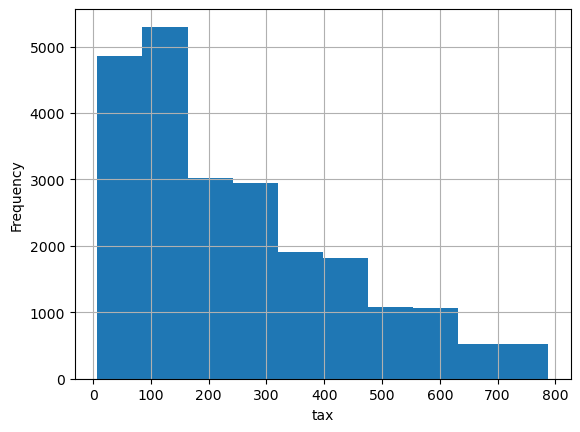

In [154]:
customer_final.Tax.hist(bins=10)
plt.xlabel('tax')
plt.ylabel('Frequency')
plt.show()

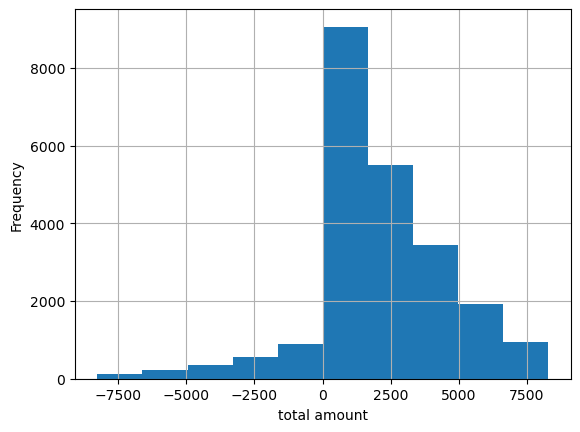

In [155]:
customer_final.total_amt.hist(bins=10)
plt.ylabel('Frequency')
plt.xlabel('total amount')
plt.show()

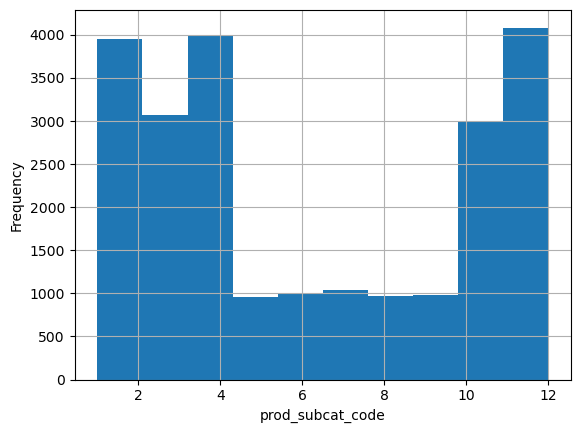

In [156]:
customer_final.prod_subcat_code.hist(bins=10)
plt.ylabel('Frequency')
plt.xlabel('prod_subcat_code')
plt.show()

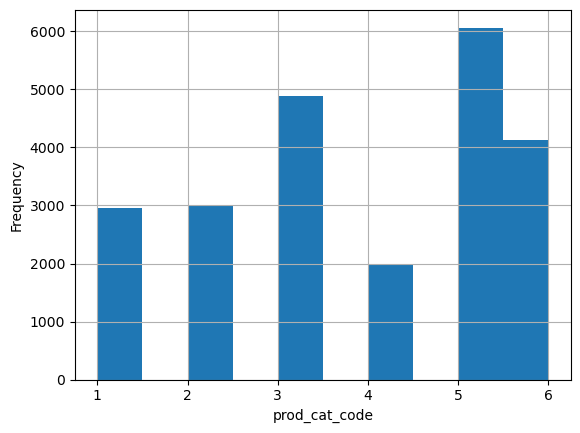

In [157]:
customer_final.prod_cat_code.hist(bins=10)
plt.ylabel('Frequency')
plt.xlabel('prod_cat_code')
plt.show()

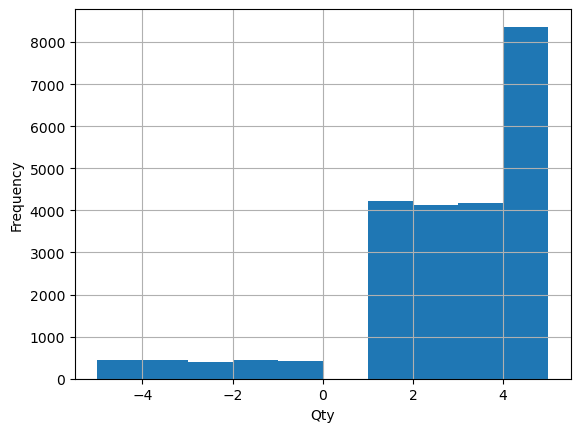

In [158]:
customer_final.Qty.hist(bins=10)
plt.ylabel('Frequency')
plt.xlabel('Qty')
plt.show()

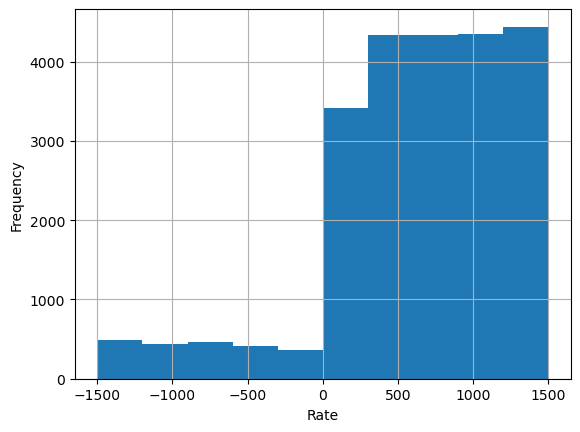

In [159]:
customer_final.Rate.hist(bins=10)
plt.ylabel('Frequency')
plt.xlabel('Rate')
plt.show()

### frequency bars for categorical variables

In [160]:
customer_final.dtypes

transaction_id               int64
cust_id                      int64
tran_date           datetime64[ns]
prod_subcat_code             int64
prod_cat_code                int64
Qty                          int64
Rate                         int64
Tax                        float64
total_amt                  float64
Store_type                  object
prod_cat                    object
prod_subcat                 object
customer_Id                  int64
DOB                 datetime64[ns]
Gender                      object
city_code                  float64
dtype: object

In [161]:
category_customer = customer_final.loc[:,customer_final.dtypes=='object']
category_customer.head()

,Store_type,prod_cat,prod_subcat,Gender
0,e-Shop,Clothing,Women,M
1,e-Shop,Electronics,Computers,F
2,TeleShop,Books,DIY,M
3,e-Shop,Home and kitchen,Bath,M
4,TeleShop,Books,DIY,M


C:\Users\fahad\AppData\Local\Temp\ipykernel_8600\3728428116.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  category_customer['Gender'] = category_customer['Gender'].astype('category')


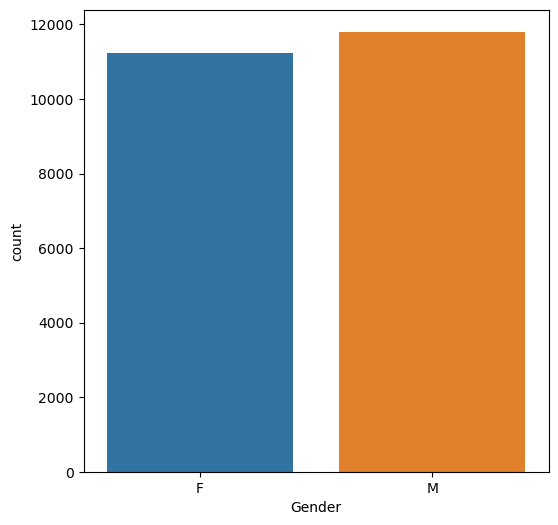

In [162]:
# Convert 'Gender' column to categorical data type
category_customer['Gender'] = category_customer['Gender'].astype('category')

# Plot countplot
plt.figure(figsize=(6, 6))
sns.countplot(data=category_customer, x='Gender')
plt.show()

C:\Users\fahad\AppData\Local\Temp\ipykernel_8600\2914097279.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  category_customer['Store_type'] = category_customer['Store_type'].astype('category')


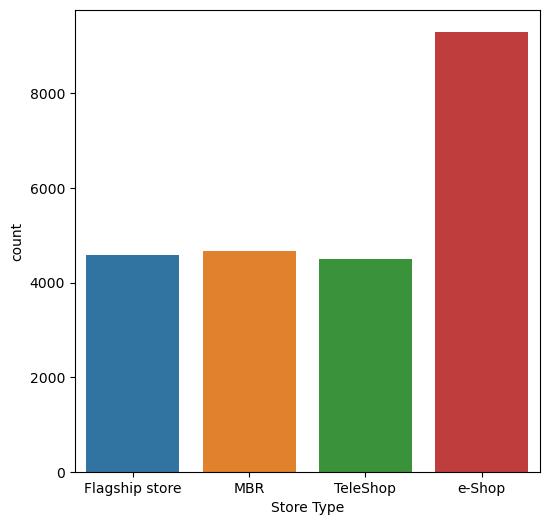

In [163]:
# Convert 'Store_type' column to categorical data type
category_customer['Store_type'] = category_customer['Store_type'].astype('category')

# Plot countplot for 'Store_type'
plt.figure(figsize=(6, 6))
sns.countplot(data=category_customer, x='Store_type')
plt.xlabel('Store Type')
plt.show()


C:\Users\fahad\AppData\Local\Temp\ipykernel_8600\2468416070.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  category_customer['prod_cat'] = category_customer['prod_cat'].astype('category')


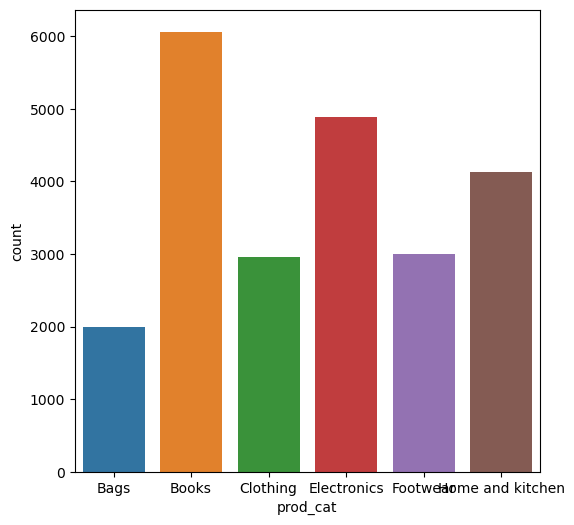

In [164]:
# Convert 'Store_type' column to categorical data type
category_customer['prod_cat'] = category_customer['prod_cat'].astype('category')

# Plot countplot for 'Store_type'
plt.figure(figsize=(6, 6))
sns.countplot(data=category_customer, x='prod_cat')
plt.xlabel('prod_cat')
plt.show()

C:\Users\fahad\AppData\Local\Temp\ipykernel_8600\2360080252.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  category_customer['prod_subcat'] = category_customer['prod_subcat'].astype('category')


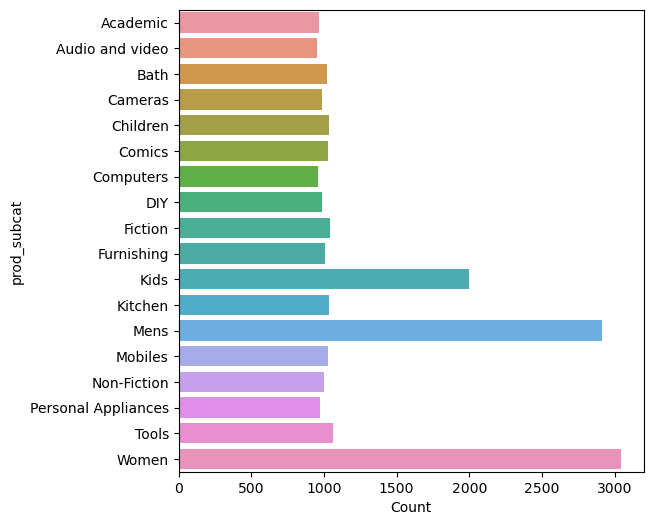

In [165]:
# Convert 'Store_type' column to categorical data type
category_customer['prod_subcat'] = category_customer['prod_subcat'].astype('category')

# Plot countplot for 'prod_subcat' horizontally
plt.figure(figsize=(6, 6))
sns.countplot(data=category_customer, y='prod_subcat')  # Use y='prod_subcat' for horizontal orientation
plt.ylabel('prod_subcat')
plt.xlabel('Count')
plt.show()


# (4) Calculate the following information using the merged dataset

### (a) Time period of the available transaction data

In [166]:
customer_final.sort_values(by='tran_date')

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat,customer_Id,DOB,Gender,city_code
22899,36332303449,268624,2011-01-02,10,6,-4,-295,123.900,-1303.900,Flagship store,Home and kitchen,Kitchen,268624,1986-09-18,F,1.0
22893,25374972356,268904,2011-01-02,2,6,5,821,431.025,4536.025,MBR,Home and kitchen,Furnishing,268904,1990-05-25,M,5.0
22894,15662366857,272756,2011-01-02,5,3,3,527,166.005,1747.005,e-Shop,Electronics,Computers,272756,1975-12-03,F,9.0
22895,28972634039,275227,2011-01-02,9,3,-1,-334,35.070,-369.070,MBR,Electronics,Cameras,275227,1989-09-23,M,4.0
22896,60041644943,267309,2011-01-02,3,2,1,392,41.160,433.160,Flagship store,Footwear,Women,267309,1973-04-08,F,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161,65228973233,270009,2014-12-02,11,5,2,301,63.210,665.210,e-Shop,Books,Children,270009,1979-04-25,M,3.0
162,83661978186,274678,2014-12-02,10,3,2,325,68.250,718.250,e-Shop,Electronics,Audio and video,274678,1975-05-20,F,9.0
147,36792372906,275246,2014-12-02,2,6,1,1185,124.425,1309.425,e-Shop,Home and kitchen,Furnishing,275246,1970-06-25,M,3.0
154,74023090711,271180,2014-12-02,8,3,3,271,85.365,898.365,Flagship store,Electronics,Personal Appliances,271180,1987-11-08,M,4.0


In [167]:
min_date=customer_final['tran_date'].min()

In [168]:
max_date=customer_final['tran_date'].max()

In [169]:
print("Time period of the available transaction data is from "+ pd.Timestamp.strftime(min_date,format="%d-%m-%Y") + " to " + pd.Timestamp.strftime(max_date,format="%d-%m-%Y"))

Time period of the available transaction data is from 02-01-2011 to 02-12-2014


### (b) Count of transactions where the total amount of transaction was negative

In [170]:
customer_final.loc[customer_final['total_amt']<0,'transaction_id'].count()

2164

# (5) Analyze which product categories are more popular among females vs male customers

In [171]:
customer_final.head()

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat,customer_Id,DOB,Gender,city_code
0,80712190438,270351,2014-02-28,1,1,-5,-772,405.300,-4265.300,e-Shop,Clothing,Women,270351,1981-09-26,M,5.0
1,29258453508,270384,2014-02-27,5,3,-5,-1497,785.925,-8270.925,e-Shop,Electronics,Computers,270384,1973-05-11,F,8.0
2,51750724947,273420,2014-02-24,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,DIY,273420,1992-07-27,M,8.0
3,93274880719,271509,2014-02-24,11,6,-3,-1363,429.345,-4518.345,e-Shop,Home and kitchen,Bath,271509,1981-06-08,M,3.0
4,51750724947,273420,2014-02-23,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,DIY,273420,1992-07-27,M,8.0


In [172]:
popular_prod=customer_final.groupby(['prod_cat','Gender'])[['Qty']].sum().reset_index()

In [173]:
popular_prod

,prod_cat,Gender,Qty
0,Bags,F,2364
1,Bags,M,2346
2,Books,F,7080
3,Books,M,7587
4,Clothing,F,3425
5,Clothing,M,3748
6,Electronics,F,5832
7,Electronics,M,6486
8,Footwear,F,3721
9,Footwear,M,3561


In [174]:
popular_prod.pivot(index='Gender',columns='prod_cat',values='Qty')

prod_cat,Bags,Books,Clothing,Electronics,Footwear,Home and kitchen
Gender,,,,,,
F,2364,7080,3425,5832,3721,4898
M,2346,7587,3748,6486,3561,5051


# (6) Which City code has the maximum customers and what was the percentage of customers from that city?

In [175]:
max_cust=customer_final.groupby('city_code')['transaction_id'].count().sort_values(ascending=False)

In [176]:
max_cust

city_code
4.0     2422
3.0     2410
5.0     2357
7.0     2356
10.0    2333
8.0     2328
2.0     2268
1.0     2255
9.0     2176
6.0     2127
Name: transaction_id, dtype: int64

In [177]:
percentage= round(max_cust[4.0]/sum(max_cust)*100,2)

In [178]:
percentage

10.52

# (7) Which store type sells the maximum products by value and by quantity?

In [179]:
customer_final.head()

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat,customer_Id,DOB,Gender,city_code
0,80712190438,270351,2014-02-28,1,1,-5,-772,405.300,-4265.300,e-Shop,Clothing,Women,270351,1981-09-26,M,5.0
1,29258453508,270384,2014-02-27,5,3,-5,-1497,785.925,-8270.925,e-Shop,Electronics,Computers,270384,1973-05-11,F,8.0
2,51750724947,273420,2014-02-24,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,DIY,273420,1992-07-27,M,8.0
3,93274880719,271509,2014-02-24,11,6,-3,-1363,429.345,-4518.345,e-Shop,Home and kitchen,Bath,271509,1981-06-08,M,3.0
4,51750724947,273420,2014-02-23,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,DIY,273420,1992-07-27,M,8.0


In [180]:
customer_final.groupby('Store_type')[['Qty','Rate']].sum().sort_values(by='Qty',ascending=False)

,Qty,Rate
Store_type,,
e-Shop,22790,5945770
MBR,11195,2953665
Flagship store,11142,2942874
TeleShop,10993,2836359


# (8) What was the total amount earned from the "Electronics" and "Clothing" categories from Flagship Stores?

In [181]:
customer_final

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat,customer_Id,DOB,Gender,city_code
0,80712190438,270351,2014-02-28,1,1,-5,-772,405.300,-4265.300,e-Shop,Clothing,Women,270351,1981-09-26,M,5.0
1,29258453508,270384,2014-02-27,5,3,-5,-1497,785.925,-8270.925,e-Shop,Electronics,Computers,270384,1973-05-11,F,8.0
2,51750724947,273420,2014-02-24,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,DIY,273420,1992-07-27,M,8.0
3,93274880719,271509,2014-02-24,11,6,-3,-1363,429.345,-4518.345,e-Shop,Home and kitchen,Bath,271509,1981-06-08,M,3.0
4,51750724947,273420,2014-02-23,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,DIY,273420,1992-07-27,M,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23048,94340757522,274550,2011-01-25,12,5,1,1264,132.720,1396.720,e-Shop,Books,Academic,274550,1972-02-21,M,7.0
23049,89780862956,270022,2011-01-25,4,1,1,677,71.085,748.085,e-Shop,Clothing,Mens,270022,1984-04-27,M,9.0
23050,85115299378,271020,2011-01-25,2,6,4,1052,441.840,4649.840,MBR,Home and kitchen,Furnishing,271020,1976-06-20,M,8.0
23051,72870271171,270911,2011-01-25,11,5,3,1142,359.730,3785.730,TeleShop,Books,Children,270911,1970-05-22,M,2.0


In [182]:
customer_final.groupby(['Store_type', 'prod_cat'])['total_amt'].sum().loc[('Flagship store', ['Clothing', 'Electronics'])]


Store_type      prod_cat   
Flagship store  Clothing       1194423.23
                Electronics    2215136.04
Name: total_amt, dtype: float64

In [183]:
grouped_data = customer_final.groupby(['Store_type', 'prod_cat'])['total_amt'].sum().loc[('Flagship store', ['Clothing', 'Electronics'])]

pivot_table=pd.pivot_table(grouped_data.reset_index(), values='total_amt', index='Store_type', columns='prod_cat')

In [184]:
pivot_table

prod_cat,Clothing,Electronics
Store_type,,
Flagship store,1194423.23,2215136.04


In [185]:
grouped_data.sum()

3409559.27

# (9) What was the total amount earned from "Male" customers under the "Electronics" category? 

In [186]:
customer_final

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat,customer_Id,DOB,Gender,city_code
0,80712190438,270351,2014-02-28,1,1,-5,-772,405.300,-4265.300,e-Shop,Clothing,Women,270351,1981-09-26,M,5.0
1,29258453508,270384,2014-02-27,5,3,-5,-1497,785.925,-8270.925,e-Shop,Electronics,Computers,270384,1973-05-11,F,8.0
2,51750724947,273420,2014-02-24,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,DIY,273420,1992-07-27,M,8.0
3,93274880719,271509,2014-02-24,11,6,-3,-1363,429.345,-4518.345,e-Shop,Home and kitchen,Bath,271509,1981-06-08,M,3.0
4,51750724947,273420,2014-02-23,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,DIY,273420,1992-07-27,M,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23048,94340757522,274550,2011-01-25,12,5,1,1264,132.720,1396.720,e-Shop,Books,Academic,274550,1972-02-21,M,7.0
23049,89780862956,270022,2011-01-25,4,1,1,677,71.085,748.085,e-Shop,Clothing,Mens,270022,1984-04-27,M,9.0
23050,85115299378,271020,2011-01-25,2,6,4,1052,441.840,4649.840,MBR,Home and kitchen,Furnishing,271020,1976-06-20,M,8.0
23051,72870271171,270911,2011-01-25,11,5,3,1142,359.730,3785.730,TeleShop,Books,Children,270911,1970-05-22,M,2.0


In [187]:
customer_final.groupby(['Gender','prod_cat'])[['total_amt']].sum().loc['M','Electronics']

total_amt    5711351.62
Name: (M, Electronics), dtype: float64

# (10) How many customers have more than 10 unique transactions, after removing all transactions which have any negative amounts? 

In [188]:
pos_amt=customer_final.loc[customer_final['total_amt']>0,:]

In [189]:
unique_tran=pos_amt.groupby(['customer_Id','prod_cat','prod_subcat'])['transaction_id'].count().reset_index()

In [190]:
unique_count=unique_tran.groupby('customer_Id')['transaction_id'].count().reset_index()

In [191]:
unique_count.head()

,customer_Id,transaction_id
0,266783,3
1,266784,3
2,266785,5
3,266788,4
4,266794,8


In [192]:
unique_count[unique_count['transaction_id'] > 10]

,customer_Id,transaction_id


In [193]:
print('There are no unique transactions greater than 10')

There are no unique transactions greater than 10


# (11) For all customers aged between 25-35, find out:

### (a) What was the total amount spent for 'Electronics' and 'Books' product categories?

In [194]:
customer_final 

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat,customer_Id,DOB,Gender,city_code
0,80712190438,270351,2014-02-28,1,1,-5,-772,405.300,-4265.300,e-Shop,Clothing,Women,270351,1981-09-26,M,5.0
1,29258453508,270384,2014-02-27,5,3,-5,-1497,785.925,-8270.925,e-Shop,Electronics,Computers,270384,1973-05-11,F,8.0
2,51750724947,273420,2014-02-24,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,DIY,273420,1992-07-27,M,8.0
3,93274880719,271509,2014-02-24,11,6,-3,-1363,429.345,-4518.345,e-Shop,Home and kitchen,Bath,271509,1981-06-08,M,3.0
4,51750724947,273420,2014-02-23,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,DIY,273420,1992-07-27,M,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23048,94340757522,274550,2011-01-25,12,5,1,1264,132.720,1396.720,e-Shop,Books,Academic,274550,1972-02-21,M,7.0
23049,89780862956,270022,2011-01-25,4,1,1,677,71.085,748.085,e-Shop,Clothing,Mens,270022,1984-04-27,M,9.0
23050,85115299378,271020,2011-01-25,2,6,4,1052,441.840,4649.840,MBR,Home and kitchen,Furnishing,271020,1976-06-20,M,8.0
23051,72870271171,270911,2011-01-25,11,5,3,1142,359.730,3785.730,TeleShop,Books,Children,270911,1970-05-22,M,2.0


In [198]:
now = pd.Timestamp('now')
customer_final['DOB'] = pd.to_datetime(customer_final['DOB'], format='%m%d%y')    # 1
customer_final['DOB'] = customer_final['DOB'].where(customer_final['DOB'] < now, customer_final['DOB'] -  np.timedelta64(100, 'Y'))   # 2
customer_final['AGE'] = (now - customer_final['DOB']).astype('<m8[Y]')

In [199]:
customer_final.head()

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat,customer_Id,DOB,Gender,city_code,AGE
0,80712190438,270351,2014-02-28,1,1,-5,-772,405.300,-4265.300,e-Shop,Clothing,Women,270351,1981-09-26,M,5.0,41.0
1,29258453508,270384,2014-02-27,5,3,-5,-1497,785.925,-8270.925,e-Shop,Electronics,Computers,270384,1973-05-11,F,8.0,50.0
2,51750724947,273420,2014-02-24,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,DIY,273420,1992-07-27,M,8.0,30.0
3,93274880719,271509,2014-02-24,11,6,-3,-1363,429.345,-4518.345,e-Shop,Home and kitchen,Bath,271509,1981-06-08,M,3.0,42.0
4,51750724947,273420,2014-02-23,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,DIY,273420,1992-07-27,M,8.0,30.0


In [200]:
customer_final['Age_cat'] = pd.cut(customer_final['AGE'],bins=[24,35,46,57],labels=['25-35','36-46','47-57'],include_lowest=True)

In [201]:
customer_final.head()

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat,customer_Id,DOB,Gender,city_code,AGE,Age_cat
0,80712190438,270351,2014-02-28,1,1,-5,-772,405.300,-4265.300,e-Shop,Clothing,Women,270351,1981-09-26,M,5.0,41.0,36-46
1,29258453508,270384,2014-02-27,5,3,-5,-1497,785.925,-8270.925,e-Shop,Electronics,Computers,270384,1973-05-11,F,8.0,50.0,47-57
2,51750724947,273420,2014-02-24,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,DIY,273420,1992-07-27,M,8.0,30.0,25-35
3,93274880719,271509,2014-02-24,11,6,-3,-1363,429.345,-4518.345,e-Shop,Home and kitchen,Bath,271509,1981-06-08,M,3.0,42.0,36-46
4,51750724947,273420,2014-02-23,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,DIY,273420,1992-07-27,M,8.0,30.0,25-35


In [202]:
customer_25_35 = customer_final.groupby(['Age_cat','prod_cat'])['total_amt'].sum()

In [203]:
customer_25_35

Age_cat  prod_cat        
25-35    Bags                 944850.140
         Books               2909136.815
         Clothing            1589876.210
         Electronics         2631050.305
         Footwear            1573448.175
         Home and kitchen    2048698.730
36-46    Bags                1957147.270
         Books               6212450.335
         Clothing            3055621.140
         Electronics         5010306.470
         Footwear            2993752.190
         Home and kitchen    4122743.950
47-57    Bags                1224344.420
         Books               3711005.480
         Clothing            1605640.140
         Electronics         3089349.055
         Footwear            1658704.450
         Home and kitchen    2273169.535
Name: total_amt, dtype: float64

In [204]:
customer_25_35.loc['25-35',['Books','Electronics']]

Age_cat  prod_cat   
25-35    Books          2909136.815
         Electronics    2631050.305
Name: total_amt, dtype: float64

In [205]:
print("Total amount spent on 'Electronics' and 'Books' product categories is", 
      customer_25_35.loc['25-35',['Books','Electronics']].sum().round(2))

Total amount spent on 'Electronics' and 'Books' product categories is 5540187.12


### (b) What was the total amount spent by these customers between 1st Jan 2014 to 1st Mar 2014?

In [206]:
customer_final.head()

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat,customer_Id,DOB,Gender,city_code,AGE,Age_cat
0,80712190438,270351,2014-02-28,1,1,-5,-772,405.300,-4265.300,e-Shop,Clothing,Women,270351,1981-09-26,M,5.0,41.0,36-46
1,29258453508,270384,2014-02-27,5,3,-5,-1497,785.925,-8270.925,e-Shop,Electronics,Computers,270384,1973-05-11,F,8.0,50.0,47-57
2,51750724947,273420,2014-02-24,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,DIY,273420,1992-07-27,M,8.0,30.0,25-35
3,93274880719,271509,2014-02-24,11,6,-3,-1363,429.345,-4518.345,e-Shop,Home and kitchen,Bath,271509,1981-06-08,M,3.0,42.0,36-46
4,51750724947,273420,2014-02-23,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,DIY,273420,1992-07-27,M,8.0,30.0,25-35


In [208]:
customer_25_35_amt=customer_final[customer_final['Age_cat']=='25-35']

In [210]:
customer_25_35_amt.head()

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat,customer_Id,DOB,Gender,city_code,AGE,Age_cat
2,51750724947,273420,2014-02-24,6,5,-2,-791,166.11,-1748.11,TeleShop,Books,DIY,273420,1992-07-27,M,8.0,30.0,25-35
4,51750724947,273420,2014-02-23,6,5,-2,-791,166.11,-1748.11,TeleShop,Books,DIY,273420,1992-07-27,M,8.0,30.0,25-35
23,91116291703,268509,2014-02-20,1,2,4,1243,522.06,5494.06,MBR,Footwear,Mens,268509,1989-08-17,M,10.0,33.0,25-35
28,88853694830,268444,2014-02-20,4,4,-3,-80,25.20,-265.20,MBR,Bags,Women,268444,1992-01-02,F,6.0,31.0,25-35
29,99581788104,267466,2014-02-20,3,2,1,96,10.08,106.08,Flagship store,Footwear,Women,267466,1987-08-06,F,7.0,35.0,25-35


In [211]:
cust_date=customer_25_35_amt[(customer_25_35_amt['tran_date']>='2014-01-01')&(customer_25_35_amt['tran_date']<='2014-03-01')]

In [212]:
cust_date

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat,customer_Id,DOB,Gender,city_code,AGE,Age_cat
2,51750724947,273420,2014-02-24,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,DIY,273420,1992-07-27,M,8.0,30.0,25-35
4,51750724947,273420,2014-02-23,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,DIY,273420,1992-07-27,M,8.0,30.0,25-35
23,91116291703,268509,2014-02-20,1,2,4,1243,522.060,5494.060,MBR,Footwear,Mens,268509,1989-08-17,M,10.0,33.0,25-35
28,88853694830,268444,2014-02-20,4,4,-3,-80,25.200,-265.200,MBR,Bags,Women,268444,1992-01-02,F,6.0,31.0,25-35
29,99581788104,267466,2014-02-20,3,2,1,96,10.080,106.080,Flagship store,Footwear,Women,267466,1987-08-06,F,7.0,35.0,25-35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048,14460826915,269348,2014-01-01,11,6,3,84,26.460,278.460,MBR,Home and kitchen,Bath,269348,1989-02-10,M,9.0,34.0,25-35
1051,32889219128,269536,2014-01-01,10,5,5,1423,747.075,7862.075,e-Shop,Books,Non-Fiction,269536,1990-03-21,M,5.0,33.0,25-35
1054,42711619809,271701,2014-01-01,1,2,5,336,176.400,1856.400,MBR,Footwear,Mens,271701,1991-07-11,M,7.0,32.0,25-35
1059,67088172893,271877,2014-01-01,1,1,1,902,94.710,996.710,e-Shop,Clothing,Women,271877,1992-03-28,F,6.0,31.0,25-35


In [216]:
print('The total amount spent by customers aged 25-35 between 1st Jan 2014 to 1st Mar 2014 is',
      cust_date['total_amt'].sum())

The total amount spent by customers aged 25-35 between 1st Jan 2014 to 1st Mar 2014 is 409779.30499999993
